## Import Libraries

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where, mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

## Generate Balanced Dataset

Counter({0: 5000, 1: 5000})


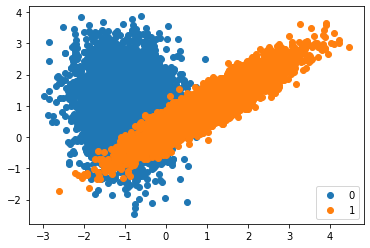

In [ ]:
# Generate 10,000 data points split evenly into two classes
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.5],
    flip_y=0,
    random_state=2)

# Show the class distributions
counter = Counter(y)
print(counter)

# Plot the dataset
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Fit Logistic Regression

In [ ]:
# Create a logistic regression model
model = LogisticRegression(solver='lbfgs')

# Setup the 10-fold cross validation, with 9 folds for training and the remaining for testing
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Repeatedly fit and evaluate the model using the AUC score
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.983


## Generate Imbalanced Dataset

Counter({0: 9950, 1: 50})


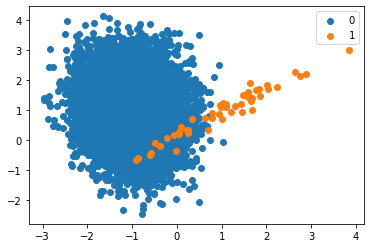

In [ ]:
# Generate a binary class dataset with 99.5% data points belonging to one class
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.995],
    flip_y=0,
    random_state=2)

# Show the class distributions
counter = Counter(y)
print(counter)

# Plot the dataset
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Fit Logistic Regression

In [ ]:
# Create a logistic regression model
model = LogisticRegression(solver='lbfgs')

# Setup the 10-fold cross validation, with 9 folds for training and the remaining for testing
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Repeatedly fit and evaluate the model using the AUC score
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.975


## Fit Class-Weighted Logistic Regression

In [ ]:
# Create a logistic regression model using the class weights
weights = {0:0.01, 1:0.995}
model = LogisticRegression(solver='lbfgs',class_weight=weights)

# Setup the 10-fold cross validation, with 9 folds for training and the remaining for testing
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Repeatedly fit and evaluate the model using the AUC score
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.983
